# Single feature analysis

## Libraries import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize

## Load data

In [2]:
df = pd.read_csv("../data/titanic.csv", sep ="\t")
y = df['Survived']
X = df.drop(columns=['Survived'])

In [3]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.7, random_state = 42)

In [4]:
analysis_df = XTrain
analysis_df['Survived'] = yTrain

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
analysis_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
89,90,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
13,14,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,0
59,60,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,0
133,134,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S,1


## Missing values?

In [6]:
for f in analysis_df:
    missing = "{} has {} values missing".format(f, analysis_df[f].isna().sum())
    print(missing)

PassengerId has 0 values missing
Pclass has 0 values missing
Name has 0 values missing
Sex has 0 values missing
Age has 5 values missing
SibSp has 0 values missing
Parch has 0 values missing
Ticket has 0 values missing
Fare has 0 values missing
Cabin has 35 values missing
Embarked has 0 values missing
Survived has 0 values missing


### Age

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2., 1., 5., 3., 7., 2., 2., 3., 0., 2.]),
 array([ 4.  , 10.65, 17.3 , 23.95, 30.6 , 37.25, 43.9 , 50.55, 57.2 ,
        63.85, 70.5 ]),
 <a list of 10 Patch objects>)

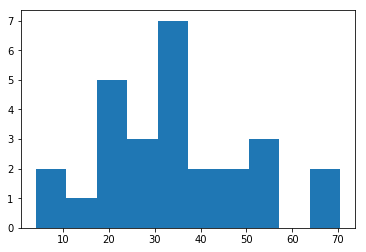

In [7]:
plt.hist(analysis_df[analysis_df['Sex'] == 'male']['Age'])

In [8]:
age_mean_male = analysis_df[analysis_df['Sex'] == 'male']['Age'].mean()
age_mean_male

33.574074074074076

(array([1., 0., 3., 2., 2., 3., 1., 1., 0., 1.]),
 array([ 5. ,  9.4, 13.8, 18.2, 22.6, 27. , 31.4, 35.8, 40.2, 44.6, 49. ]),
 <a list of 10 Patch objects>)

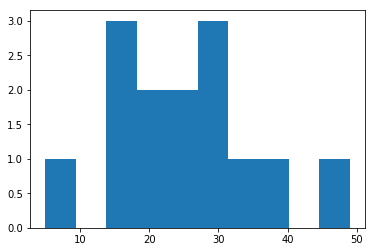

In [9]:
plt.hist(analysis_df[analysis_df['Sex'] == 'female']['Age'])

In [10]:
age_mean_female = analysis_df[analysis_df['Sex'] == 'female']['Age'].mean()
age_mean_female

24.857142857142858

In [11]:
analysis_df.loc[analysis_df['Sex']=='male','Age'] = analysis_df.loc[analysis_df['Sex']=='male','Age'].fillna(age_mean_male)
analysis_df.loc[analysis_df['Sex']=='female','Age'] = analysis_df.loc[analysis_df['Sex']=='female','Age'].fillna(age_mean_female)

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(array([ 3.,  3.,  9.,  7., 13.,  3.,  3.,  3.,  0.,  2.]),
 array([ 4.  , 10.65, 17.3 , 23.95, 30.6 , 37.25, 43.9 , 50.55, 57.2 ,
        63.85, 70.5 ]),
 <a list of 10 Patch objects>)

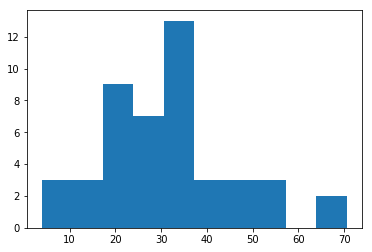

In [12]:
plt.hist(analysis_df['Age'])

## Categorical to numerical

In [13]:
mapping = {'male': 0, 'female': 1}
analysis_df=analysis_df.replace({'Sex': mapping})

## Survival Rate

AGE

In [14]:
def compute_survival_rate(data, feature, output_flag):
    if '{}_SR'.format(feature) in data.columns:
        data = data.drop(['{}_SR'.format(feature)], axis=1)

    # Get the mean of default (i.e Survival rate) for each distinct value
    grouping = data[[feature, output_flag]].groupby([feature], as_index=False)[output_flag].mean()
    grouping.columns = [feature, '{}_SR'.format(feature)]

    # Merge it to the main self._dataframe
    data = pd.merge(data, grouping, how='left', on=feature)

    return data

In [15]:
analysis_df = compute_survival_rate(analysis_df,'Age','Survived')
analysis_df = analysis_df.sort_values(by=['Age'])

(array([ 3.,  3.,  9.,  7., 13.,  3.,  3.,  3.,  0.,  2.]),
 array([ 4.  , 10.65, 17.3 , 23.95, 30.6 , 37.25, 43.9 , 50.55, 57.2 ,
        63.85, 70.5 ]),
 <a list of 10 Patch objects>)

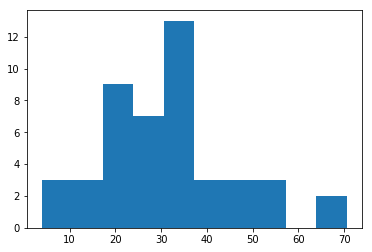

In [16]:
plt.hist(analysis_df['Age'])

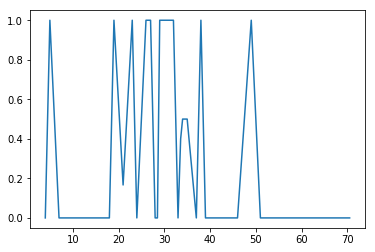

In [17]:
plt.plot(analysis_df['Age'],analysis_df['Age_SR'])

In [18]:
analysis_df['Age_disc'], bins = pd.qcut(analysis_df['Age'],q=4,labels=False, retbins=True)

In [19]:
analysis_df = compute_survival_rate(analysis_df,'Age_disc','Survived')
analysis_df = analysis_df.sort_values(by=['Age_disc'])

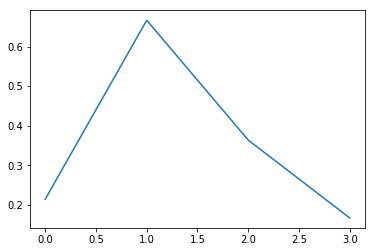

In [20]:
plt.plot(analysis_df['Age_disc'],analysis_df['Age_disc_SR'])

In [21]:
bins

array([ 4. , 21. , 32.5, 36.5, 70.5])

SEX

In [22]:
analysis_df = compute_survival_rate(analysis_df,'Sex','Survived')
analysis_df = analysis_df.sort_values(by=['Sex'])

(array([32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

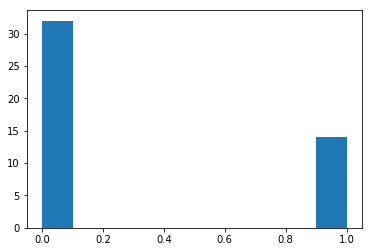

In [23]:
plt.hist(analysis_df['Sex'])

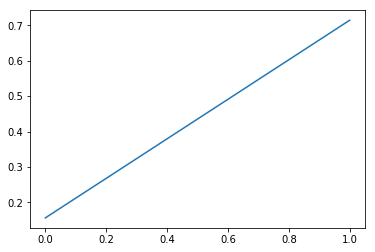

In [24]:
plt.plot(analysis_df['Sex'],analysis_df['Sex_SR'])

FARE

In [25]:
analysis_df = compute_survival_rate(analysis_df,'Fare','Survived')
analysis_df = analysis_df.sort_values(by=['Fare'])

(array([30.,  7.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  6.975 ,  32.5775,  58.18  ,  83.7825, 109.385 , 134.9875,
        160.59  , 186.1925, 211.795 , 237.3975, 263.    ]),
 <a list of 10 Patch objects>)

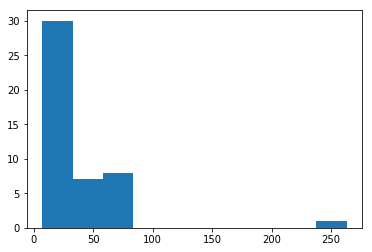

In [26]:
plt.hist(analysis_df['Fare'])

In [27]:
analysis_df['Fare'] = winsorize(analysis_df['Fare'],limits=[0.025, 0.025])

(array([30.,  7.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  6.975 ,  32.5775,  58.18  ,  83.7825, 109.385 , 134.9875,
        160.59  , 186.1925, 211.795 , 237.3975, 263.    ]),
 <a list of 10 Patch objects>)

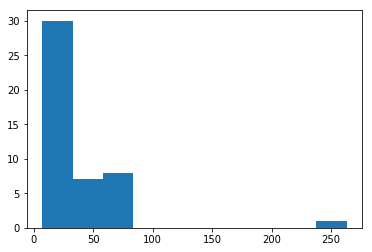

In [28]:
plt.hist(analysis_df['Fare'])

In [29]:
analysis_df = compute_survival_rate(analysis_df,'Fare','Survived')
analysis_df = analysis_df.sort_values(by=['Fare'])

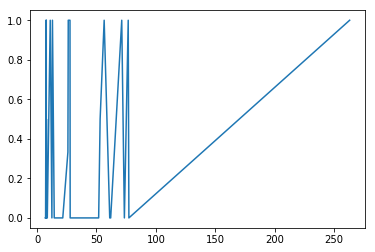

In [30]:
plt.plot(analysis_df['Fare'],analysis_df['Fare_SR'])

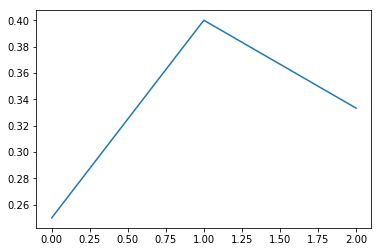

In [31]:
analysis_df['Fare_disc'], bins = pd.qcut(analysis_df['Fare'],q=3,labels=False, retbins=True)
analysis_df = compute_survival_rate(analysis_df,'Fare_disc','Survived')
analysis_df = analysis_df.sort_values(by=['Fare_disc'])
plt.plot(analysis_df['Fare_disc'],analysis_df['Fare_disc_SR'])

In [32]:
bins

array([  6.975 ,   8.6542,  39.6875, 263.    ])

### Conclusion

- Age: replace missing values + discretization
- Sex: apply mapping
- Fare: winsorize + discretize

In [33]:
pipeline_instructions ={
    "Age" : {
        "replace_missings" : {"apply":True, "value": 30},
        "winsorize" : {"apply": False, "value": None},
        "discretize" : {"apply": False, "value": None}
    },
    "Sex" : {
        "replace_missings" : {"apply":False, "value": None},
        "winsorize" : {"apply": False, "value": None},
        "discretize" : {"apply": True, "value": 4}},
    "Fare" : {
        "replace_missings" : {"apply":False, "value": None},
        "winsorize" : {"apply": True, "value": 0.025},
        "discretize" : {"apply": True, "value": 3}}
}

In [34]:
pipeline_instructions

{'Age': {'replace_missings': {'apply': True, 'value': 30},
  'winsorize': {'apply': False, 'value': None},
  'discretize': {'apply': False, 'value': None}},
 'Sex': {'replace_missings': {'apply': False, 'value': None},
  'winsorize': {'apply': False, 'value': None},
  'discretize': {'apply': True, 'value': 4}},
 'Fare': {'replace_missings': {'apply': False, 'value': None},
  'winsorize': {'apply': True, 'value': 0.025},
  'discretize': {'apply': True, 'value': 3}}}